<font size="6">**Classifying Heart Disease Patient Using Age and 
Maximum Heart Rate Achieved In Cleveland**</font>

<font size="2"> Xinli (Emma) Wang </font>

<font size="5"> **Introduction** </font> 

Heart disease describes a range of conditions that affect the heart. Nowadays, many forms of heart disease can be prevented or treated with healthy lifestyle choices (Mayo Clinic Staff, 2022).

This type of disease affects the heart or blood vessels and the risks may be increased by smoking, high blood pressure, high cholesterol, unhealthy diet, lack of exercise and obesity (National Cancer Institute). With high cholesterol, you can develop fatty deposits in your blood vessels. Eventually, these deposits grow, making it difficult for enough blood to flow through your arteries. Sometimes, those deposits can break suddenly and form a clot that causes a heart attack or stroke.

People age 65 and older are much more likely than younger people to develop coronary heart disease. Aging can cause changes in the heart and blood vessels. For example, as you get older, your heart can't beat as fast during physical activity or times of stress as it did when you were younger (National Institue on Aging, 2018).

The purpose of this classification project is to use the factors "age" and "Maximum Heart Rate Achieved (thalach)" to classify patients on whether or not they will have heart disease in the future. In addition, a knn-classifier algorithm will be used.

In order to answer the question **Will a new patient likely have heart disease in the future based on age and maximum heart rate achieved?**, "processed.cleveland.data" in the "Heart Disease" dataset provided by UC Irvine Machine Learning Repository is used. 

The 14 columns of the dataset include, we will be using age (age of petients) and thalach (maxiumum heart rate achieved) to perform our classification:  
        1. **age**= Age (years)  
        2. **sex**= Sex (1=male; 0=female)  
        3. **cp**= Chest pain type (1=typical angina; 2=atypical angina; 3=non-anginal pain; 4=asymptomatic)  
        4. **trestbps**= Resting blood pressure (mm Hg)  
        5. **chol**= Serum cholestroal (mg/dl)  
        6. **fbs**= Fasting blood sugar (> 120 mg/dl) (1=true; 0=false)  
        7. **restecg**= Resting electrocardiographic results  
        8. **thalach**= Maximum heart rate achieved (0=normal; 1=having ST-T wave abnormality)  
        9. **exang**= Exercise induced angina (1=yes; 0=no)  
        10. **oldpeak**= ST depression induced by exercise relative to rest  
        11. **slope**= The slope of the peak exercise ST segment (1=upsloping; 2=flat; 3=downsloping)  
        12. **ca**= Number of major blood vessels (0-3) coloured by flourosopy  
        13. **thal**= (3=normal; 6=fixed defect; 7=reversable defect)  
        14. **num**= Diagnosis of heart disease (angiographic disease status) (0=present; 1,2,3,4=not present)  

<font size="5"> **Methods & Results** </font>  

<font size="4"> 1. Prelimary exploratory data analysis </font>   
- Libraries are loaded and "processed.cleveland.data" is read from the internet web address into R by saving the web address as url and reading the url using the read_csv function, 
- Dataset is wrangled and cleaned into usable, tidy data necessary for the planned analysis by naming current columns and inserting new columns, unknown values are also filtered out,
- Columns are mutated into the correct categories,
- Dataset is split into training and testing data (only training dataset is used for classification),
- Training dataset is summarized into one table in order to make predictions and the max, min, and average values of all predicting variables were determined using the group_by and summarize functions,
- Visualization is generated in order to represent the correlation between "age" and "thalach" using a scatterplot and the ggplot function.

<font size="4"> 2. Determining and visualizing the best k value </font>  
- Training dataset is centered and scaled using the recipe function,
- The best k value is determinde by creating a k-nearest model using the neighbors=tune() function with the seed set as 2024,
- The training data is cross validated with 10 folds using the vfold_cv function,
- The recipe and k-nearest model are combined to create workflow,
- Filtered for accuracy to find the best k value,
- Visualization is generated in order to visualize the relationship between the "neighbors (k)" and the "accuracy estimate".

<font size="4"> 3. Testing accuracy of classifier</font>
- Evaluated the prediction accuracy of the classifier by using the predict function on the testing data,
- Generated a confusion matrix for better application in a real-world senario.
- Three patients (data points) were chosen randomly from the Switzerland data set and were ran using the classifier to test the model.

<font size="5">Prelimary exploratory data analysis</font>  

<font size="4">Loading libraries and setting seed</font>

In [126]:
#Required library packages are loaded in R,

library(tidyverse)
library(tidymodels)
library(repr)

#setting the seed,

set.seed(2024)

<font size="4"> Loading dataset</font>  


In [127]:
#Saving the cleveland data web address into url,

url<-"https://raw.githubusercontent.com/UBC-DSCI/dsci-100-project_template/main/data/heart_disease/processed.cleveland.data"

#loading the data web address into R using read_csv,

cleveland_raw<-read_csv(url)

cleveland_raw

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


63.0,1.0...2,1.0...3,145.0,233.0,1.0...6,2.0,150.0,0.0...9,2.3,3.0,0.0...12,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


**Figure 1**

All columns in the raw cleveland dataframe are originally unnamed, and some factor columns are incorrectly read as <dbl> or <chr>. It is also given by the publisher of the dataset that all columns are numeric with 303 rows and all missing data are shown by the symbol "?". 

<font size="4"> Wrangling and cleaning dataframe</font>

In [128]:
#Column names are assigned accordingly to the raw dataframe ,

cleveland_col<-cleveland_raw

colnames(cleveland_col)<-c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num")

#"unknown (?)" values are filtered out,

cleveland_filtered<-cleveland_col|>
    filter(cp!="?", trestbps!="?",
           chol!="?", fbs!="?",
           restecg!="?", thalach!="?",
           exang!="?", oldpeak!="?",
           slope!="?", ca!="?",
           thal!="?", num!="?")

#categorical columns are mutated with "as.factor()" into factor datatypes,

cleveland_mutated<-cleveland_filtered|>
    mutate(sex=as.factor(sex),
           cp=as.factor(cp),
           fbs=as.factor(fbs),
           restecg=as.factor(restecg),
           exang=as.factor(exang),
           slope=as.factor(slope),
           thal=as.factor(thal))

#the "num" column is wrangled to identify whether the patient has (num=0) or does not have heart disease (num=1,2,3,4),
#and only the data columns that we are interested in are selected,

cleveland_data<-cleveland_mutated|>
    mutate(dis=as.factor(ifelse(is.na(num),NA,(num>0))))|>
    select(age, thalach, num, dis)

cleveland_data

age,thalach,num,dis
<dbl>,<dbl>,<dbl>,<fct>
67,108,2,TRUE
67,129,1,TRUE
37,187,0,FALSE
41,172,0,FALSE
56,178,0,FALSE
62,160,3,TRUE
57,163,0,FALSE
63,147,2,TRUE
53,155,1,TRUE


**Figure 2**  

To tidy the raw data frame, first the column names are assigned according to the information given by the publisher of the heart disease data. Then the incorrect dbl columns are changed to the proper fct columns are they represented categorical columns. Finally, the ifelse function was used to generate a new column ("dis") based off of "num" that showed whether the patient has heart disease using "TRUE" or "FALSE" with 0 being false and all other values being true. Using the select function, the predicting variables were selected to prepare for the following visualization. 

<font size="4"> Splitting the data</font>

In [129]:
#Splitting the dataframe into two sets of data, the training set and the testing set; with 75% of the original cleveland data set ending up in the training set,

cleveland_split<-initial_split(cleveland_data,prop=0.75,strata=dis)

cleveland_training<-training(cleveland_split)

cleveland_testing<-testing(cleveland_split)

cleveland_training

age,thalach,num,dis
<dbl>,<dbl>,<dbl>,<fct>
41,172,0,FALSE
56,178,0,FALSE
57,148,0,FALSE
56,153,0,FALSE
57,174,0,FALSE
54,160,0,FALSE
48,139,0,FALSE
49,171,0,FALSE
58,162,0,FALSE


**Figure 3**  

The initial_split function was used to split the dataframe into the training set (75%) and testing set (25%). The two sets of data were then run by the training function and testing function respectively.

<font size="4"> Summarizing the data

In [130]:
#Summarizing the data to find the max, min, and average values for all predicting variables,

cleveland_summarized<-cleveland_training|>
    group_by(dis)|>
    summarize(num_patients=n(),
              max_age=max(age), min_age=min(age), avg_age=mean(age),
              max_thalach=max(thalach), min_thalach=min(thalach), avg_thalach=mean(thalach))

cleveland_summarized

dis,num_patients,max_age,min_age,avg_age,max_thalach,min_thalach,avg_thalach
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,119,76,29,52.66387,202,96,158.2941
TRUE,102,77,35,56.52941,195,71,140.3627


**Figure 4**  

To summarize the data into one table, the group_by function was used to group the "dis" column, then followed by the summarize function to obtain the max, min, and average values of the variables.

It is shown that a patient with heart disease has higher age and lower maximum heart rate achieved, which we are expecting our classifier to predict similar diagnosis in later applications.

<font size="4"> Visualizing the correlation between "age" and "maximum heart rate achieved"</font>

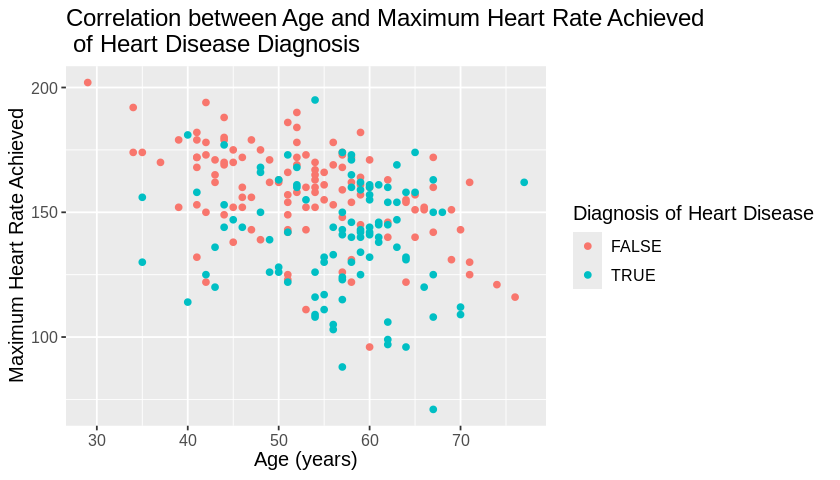

In [131]:
#Plotting the data to visualize the correlation between our variables using the training data,

options(repr.plot.width=7,repr.plot.height=4)

cleveland_plot<-cleveland_training|>
    ggplot(aes(x=age,y=thalach))+
    geom_point(aes(color=dis))+
    labs(x="Age (years)", 
         y="Maximum Heart Rate Achieved",
         color="Diagnosis of Heart Disease",
         title="Correlation between Age and Maximum Heart Rate Achieved \n of Heart Disease Diagnosis")+
    theme(text=element_text(size=12))

cleveland_plot

**Figure 5**  

Figure 5 shows the correlation between the two predicting variables: "age" and "maximum heart rate achieved" using a scatterplot. Data points with no heart disease are given in red and data points with heart disease are given in blue. Some data points can be possibly classified as outliers which may potentially cause issues in later steps.

<font size="5"> Determining the best K value</font>  


In [132]:
set.seed(2024)

#Centering and scaling the training data,

cleveland_recipe<-recipe(dis~age+thalach,data=cleveland_training)|>
    step_center(all_predictors())|>
    step_scale(all_predictors())

#creating k-nearest neighbors classifier using neighbors=tune(),

cleveland_tune<-nearest_neighbor(weight_func="rectangular",neighbors=tune())|>
    set_engine("kknn")|>
    set_mode("classification")

#performing 5-fold cross validation,

vfold<-vfold_cv(cleveland_training,v=10,strata=dis)

gridivals<-tibble(neighbors=c(1:100))

#now creating workflow by combining the recipe and model specification,
#building classifier using fit with the tune_grid function,

cleveland_results<-workflow()|>
    add_recipe(cleveland_recipe)|>
    add_model(cleveland_tune)|>
    tune_grid(resamples=vfold,grid=gridivals)|>
    collect_metrics()|>
    filter(.metric=="accuracy")|>
    select(neighbors,mean)|>
    arrange(desc(mean))

cleveland_results

neighbors,mean
<int>,<dbl>
15,0.7374553
13,0.7289761
14,0.7289761
16,0.7283644
17,0.7242142
18,0.7242142
20,0.7196687
11,0.7194523
12,0.7194523


**Figure 6**  

It is given by Figure 6 that the highest accuracy rate (73.7%) occurs at k = 15.

<font size="4"> Visualizing the data analysis</font>

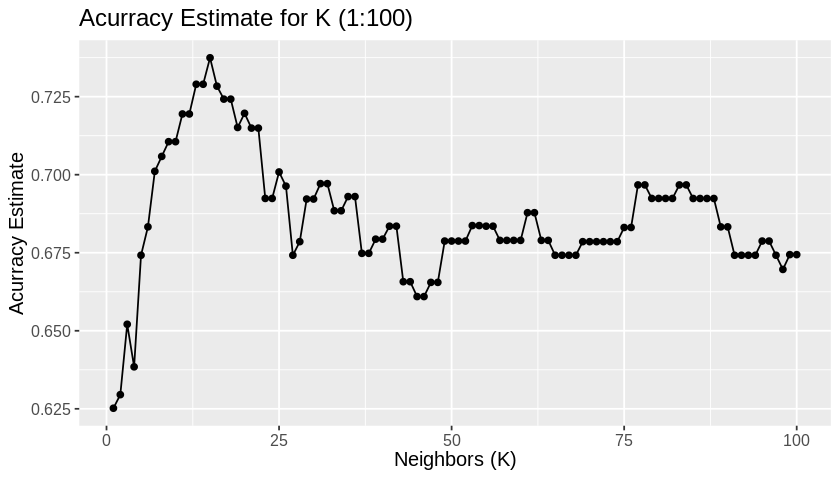

In [133]:
set.seed(2024)

#Creating plot to visualize accuracy,

options(repr.plot.width=7,repr.plot.height=4)

cleveland_results_plot<-cleveland_results|>
    ggplot(aes(x=neighbors,y=mean))+
    geom_point()+
    geom_line()+
    labs(x="Neighbors (K)",y="Acurracy Estimate",title="Acurracy Estimate for K (1:100)")+
    theme(text=element_text(size=12))

cleveland_results_plot

**Figure 7**  

The plot visualizes the accuracy estimate for k from 1 to 100, giving the highest peak at k=15, therefore k=15 is chosen.

<font size="4"> Creating final model</font>  

Since we now have our best k value figured out, we are able to retrain the knn classifier using the best k value we just determined from above 

In [134]:
#Fitting the new k value into the training data using neighbors=15,

final_spec<-nearest_neighbor(weight_func="rectangular", neighbors=15)|>
    set_engine("kknn")|>
    set_mode("classification")

cleveland_fit<-workflow()|>
    add_recipe(cleveland_recipe)|>
    add_model(final_spec)|>
    fit(data=cleveland_training)

cleveland_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(15,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.280543
Best kernel: rectangular
Best k: 15

**Figure 8**    

Training data was retrained using k=15.

<font size="4"> Testing accuracy of classifier </font>



In [136]:
#Making predictions and assessing the estimated accuracy of the best model on the test data,

cleveland_test_predictions<-predict(cleveland_fit,cleveland_testing)|>
    bind_cols(cleveland_testing)

#computing the accuracy,

cleveland_accuracy<-cleveland_test_predictions|>
    metrics(truth=dis,estimate=.pred_class)|>
    filter(.metric=="accuracy")

cleveland_accuracy

#computing the precision,

cleveland_precision<-cleveland_test_predictions|>
    precision(truth=dis,estimate=.pred_class)

cleveland_precision

#generating confusion matrix for better application in real-world scenarios,

confusion_matrix<-cleveland_test_predictions|>
    conf_mat(truth=dis,estimate=.pred_class)

confusion_matrix

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6933333


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.6888889


          Truth
Prediction FALSE TRUE
     FALSE    31   14
     TRUE      9   21

**Figure 9**  

We can see here that our classifier was 69.3% accurate, 68.9% precise and labeled 52 out of 75 observations correctly with 14 over diagnoses and 9 under diagnoses.

<font size="4"> Testing the classifier model using the Switzerland data</font>

In [137]:
#Saving the switzerland data wed address into url_switzerland,

url_switzerland<-"https://raw.githubusercontent.com/UBC-DSCI/dsci-100-project_template/main/data/heart_disease/processed.switzerland.data" # dataset read in csv in R and assigning columns names.

#loading the switzerland web address into R using read_csv,
#column names are assigned accordingly to the raw dataframe,

switzerland_col<-read_csv(url_switzerland, col_names=c("age","sex","cp","trestbps","chol", "fbs", "restecg",
                                          "thalach", "exang","oldpeak","slope","ca","thal","num"))

#categorical columns are mutated with "as.factor()" into factor datatypes,
#the "num" column is wrangled to identify whether the patient has (num=0) or does not have heart disease (num=1,2,3,4),

switzerland_mutated<-switzerland_col|>
    mutate(sex=as.factor(sex))|>
    mutate(cp=as.factor(cp))|>
    mutate(fbs=as.factor(fbs))|>
    mutate( restecg=as.factor(restecg))|>
    mutate(exang=as.factor(exang))|>
    mutate(slope=as.factor(slope))|>
    mutate(thal=as.factor(thal))|>
    mutate(num=as.factor(num))|>
    mutate(dis=as.factor(ifelse(is.na(num),NA,(num>0))))

#"unknown (?)" values are mutated into "NA",
#and only the data columns that we are interested in are selected

switzerland_data<-switzerland_mutated|>
    mutate(trestbps=fct_recode(trestbps,"NA"="?"))|>
    mutate(thalach=fct_recode(thalach,"NA"="?"))|>
    select(age,thalach,num,dis)

switzerland_data

Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal
dbl (5): age, sex, cp, chol, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `dis = as.factor(ifelse(is.na(num), NA, (num > 0)))`.
Caused by warning in `Ops.factor()`:
! ‘>’ not meaningful for factors”


age,thalach,num,dis
<dbl>,<fct>,<fct>,<fct>
32,127,1,NA
34,154,1,NA
35,130,3,NA
36,125,1,NA
38,166,2,NA
38,156,1,NA
38,179,0,NA
38,128,1,NA
38,150,2,NA


**Figure 10**  

Switzerland dataframe loaded from the heart disease data base, will be used to test the classification model created using the Cleveland data.

In [138]:
#Three random patients were chosen from the switzerland data set,
#patient 1 with (60,99,true),

patient_1<-tibble(age=60, thalach = 99)


new_fit_1<-workflow()|>
          add_recipe(cleveland_recipe)|>
          add_model(final_spec)|>
          fit(data=cleveland_training)

testing_1<-predict(new_fit_1,patient_1) 

#patient 2 with (66,90,true),

patient_2<-tibble(age=66,thalach = 90)

new_fit_2<-workflow()|>
          add_recipe(cleveland_recipe)|>
          add_model(final_spec)|>
          fit(data=cleveland_training)

testing_2<-predict(new_fit_2, patient_2)

#and patient 3 with (55,150,false),

patient_3<-tibble(age=55,thalach=150 )

new_fit_3<-workflow()|>
          add_recipe(cleveland_recipe)|>
          add_model(final_spec)|>
          fit(data=cleveland_training)

testing_3<-predict(new_fit_3, patient_3)


testing_1
testing_2
testing_3

.pred_class
<fct>
TRUE


.pred_class
<fct>
TRUE


.pred_class
<fct>
FALSE


**Figure 11**  

Three random existing patients were chosen from the Switzerland data and were ran using the created classification model. All three patient were predicted correctly with patient 1 and patient 2 having heart disease, and patient 3 not having any heart-related diseases. 

<font size="5"> **Discussion** </font>  

<font size="4"> Summarization of findings</font>  
The purpose of this project was to answer the question: "Will a new patient likely have heart disease in the future based on age and maximum heart rate achieved?", in order to find an answer, a classifier that used age and maximum heart rate achieved was created to help us diagnosed patient who will likely have heart disease.  

First the dataset was tidied and split into the training and testing data sets, then we were able to determine the best k value (15) by centering and scaling the training data, tuning the model, and performing cross validations.

Then the determined best k value was tested on the testing dataset to check its function, it was used to predict whether a patient will have heart disease using the following predictors: "age" and "maximum heart rate achieved". The classifier returned with 69.3% accuracy, 68.9% precision and was able to label 52 out of 75 observations correctly.  

Finally, three random patients were chosen from the switzerland data set to test the created classifier model, all three were predicted correctly.

<font size="4"> Expected findings vs outcome</font>  
It was expected that a person with older age and higher maximum heart rate achieved will most likely have heart disease. High accuracy and precisions were expected for the classifier (minimum 60%), due to both predictors being high contributing factors to heart disease when doing pre-exploratory research on the topic.

The resulting classifier had an accuracy of 69.3% and a precision of 68.9%, which is what was expected from the pre-exploratory findings. However, the accuracy and precision could be improved with a larger sample size and more contributing predicting variables.

The outcomes are as expected, patients with higher maximum heart rate achieved and higher age (above and around 60) are more likely to have heart disease, as mentioned in the introduction section. The visualizations can be improved with a larger data set for better and clearer divisions across the plot.  

<font size="4"> Impact of findings</font>  
Being able to classify and diagnose future heart disease could help with early interventions and medications, help save patient lives and offer them a chance with a healthier and higher quality life. These findings will help doctors and patients to better understand what risk factors should be avoided to obtain a possible heart disease-free, healthy life. It could also help patients save money by possibly giving a chance for cheaper, early diagnosis and treatment and help doctors save resources.  

This classifier model could help both patients and doctors in both the medical field or simply just quality everyday life.  

<font size="4"> future questions</font>  
1. Which variables correlate with potential heart disease?
2. People with which variables will be the most prone to future heart conditions?

<font size="5">References</font>

1. “Ifelse Function | R Documentation.” Www.rdocumentation.org, www.rdocumentation.org/packages/base/versions/3.6.2/topics/ifelse.  

2. Mayo Clinic Staff. “Heart Disease.” Mayo Clinic, 25 Aug. 2022, www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118.  

3. “UCI Machine Learning Repository.” Archive.ics.uci.edu, archive.ics.uci.edu/dataset/45/heart+disease. 

4. American Heart Association. “What Is Cardiovascular Disease?” Www.heart.org, American Heart Association, 10 Jan. 2024, www.heart.org/en/health-topics/consumer-healthcare/what-is-cardiovascular-disease.
5. National Institute on Aging. “Heart Health and Aging.” National Institute on Aging, 1 June 2018, www.nia.nih.gov/health/heart-health/heart-health-and-aging.